In [12]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


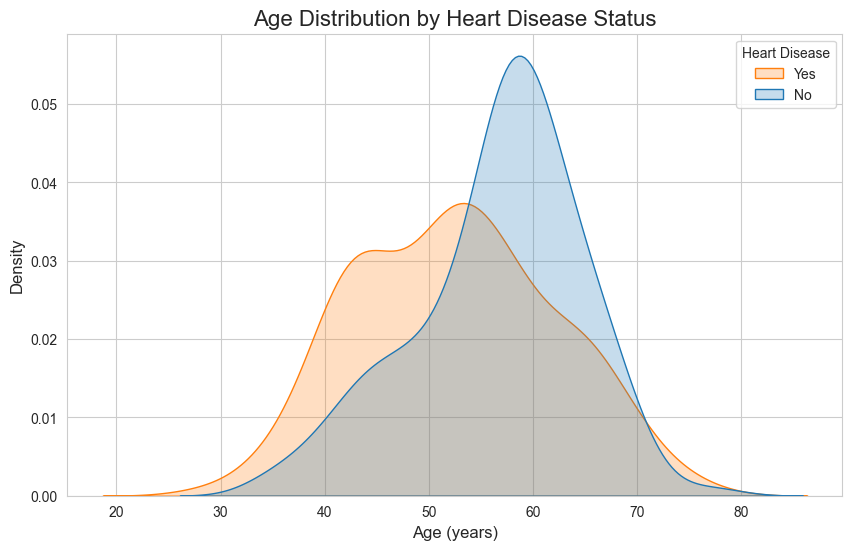

In [15]:
# Set the style for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create KDE plot with 'target' as the hue
sns.kdeplot(data=df, x='age', hue='target', fill=True, common_norm=False)

# Add titles and labels for clarity
plt.title('Age Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Heart Disease', labels=['Yes', 'No']) # Note: Seaborn might label 0 as 'No' and 1 as 'Yes' automatically
plt.show()

C:\Users\PCS\AppData\Local\Temp\ipykernel_8008\4292823624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='chol', palette='viridis')


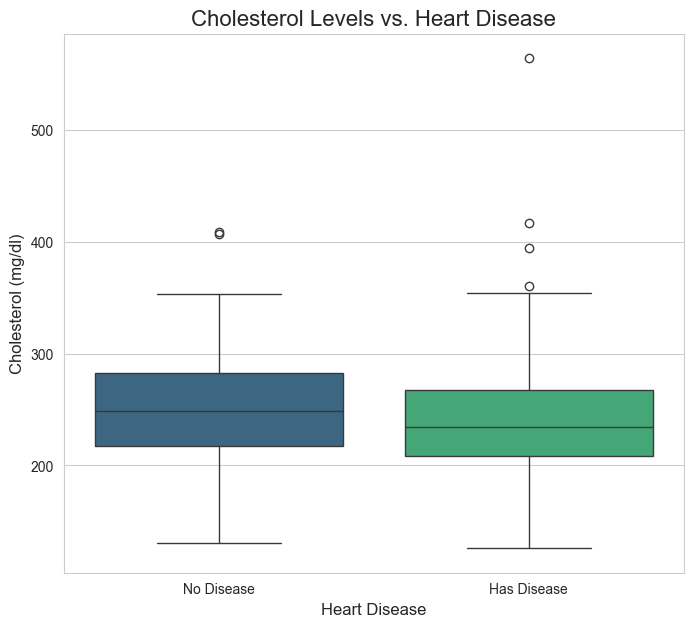

In [7]:
plt.figure(figsize=(8, 7))

# Create a box plot
sns.boxplot(data=df, x='target', y='chol', palette='viridis')

# Add titles and labels
plt.title('Cholesterol Levels vs. Heart Disease', fontsize=16)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.xticks([0, 1], ['No Disease', 'Has Disease']) # Set custom labels for the x-axis
plt.show()

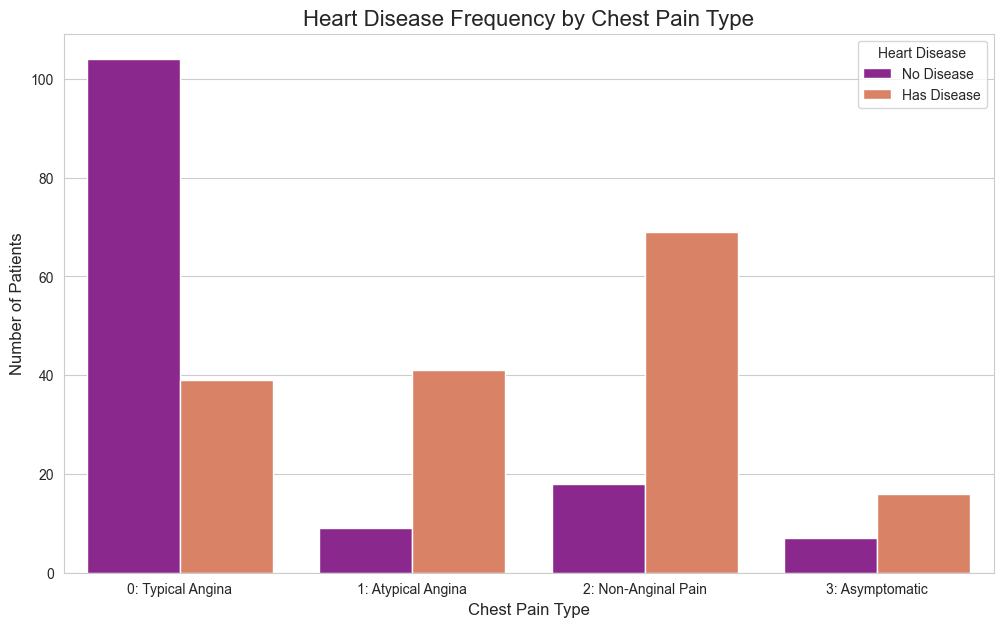

In [16]:
plt.figure(figsize=(12, 7))

# Create a count plot
sns.countplot(data=df, x='cp', hue='target', palette='plasma')

# Add titles and labels
plt.title('Heart Disease Frequency by Chest Pain Type', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Improve the legend and labels for clarity
plt.xticks(
    ticks=[0, 1, 2, 3], 
    labels=['0: Typical Angina', '1: Atypical Angina', '2: Non-Anginal Pain', '3: Asymptomatic']
)
plt.legend(title='Heart Disease', labels=['No Disease', 'Has Disease'])
plt.show()

In [25]:
x = df.drop('target', axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1500)
model.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1500
,multi_class,'deprecated'


In [26]:
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 88.52%
